In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy import integrate
import matplotlib as mpl
from scipy import interpolate
import time

from ABM_package import *

In [2]:
rp = 0.5
rd = 0.125
rm = 1.0
f= 2

A_out,t_out,plot_list = BDM_ABM(rp,rd,rm,f,T_end=15.0)

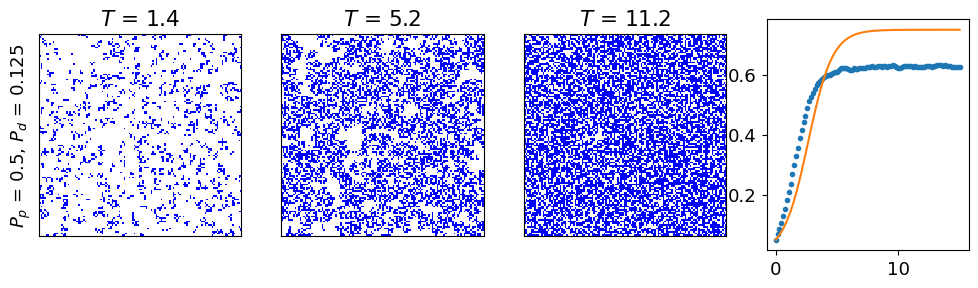

In [3]:
plot_ind = [2,7,15]

cmaplist = [(1.0,1.0,1.0,1.0),(0.0,0.0,1.0,1.0)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, N = 2)

font = {'size'   : 13}

plt.rc('font', **font)

fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(1,4,4,adjustable='box')

r = rp-rd
K = r/rp
c0 = 0.05
logist = K*c0*(np.e**(r*t_out))/(K + c0*(np.e**(r*t_out)-1))

ax.plot(t_out*(rp-rd),A_out/plot_list[0].size,'.')
ax.plot(t_out*(rp-rd),logist)

for i in np.arange(3):

    ax = fig.add_subplot(1,4,1+i,adjustable='box')
    ax.matshow(plot_list[plot_ind[i]],cmap=cmap,vmin=0,vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("$T$ = " + str(round(t_out[plot_ind[i]*5-1]*(rp-rd),1)))

    if i == 0:
        ax.set_ylabel("$P_p$ = "+str(rp)+", $P_d$ = "+str(rd))

plt.savefig("nf_plot"+ str(f)+ ".pdf")